# Linear Regression

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
# Training Data
df = pd.read_csv("TSLA-Data.csv", header=0, na_values='?')
df = df.dropna()

# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price, Volume)
X = np.array(df[['Open', 'High', 'Low', 'Volume']])
# Add days since public column
days = np.arange(X.shape[0]).reshape(X.shape[0], 1)
X = np.hstack((days, X))
y = np.array(df['Close'])

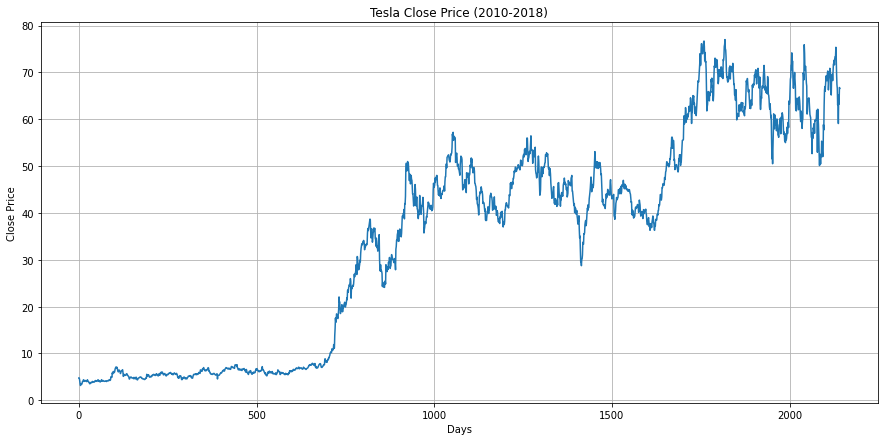

In [3]:
# Plot training data
plt.figure(figsize=(15,7))
plt.title('Tesla Close Price (2010-2018)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(y)
plt.grid()
plt.show()

In [4]:
# Validation Data (Validation Set using 2019 data)
df2 = pd.read_csv("TSLA-2019.csv", header=0, na_values='?')
df2 = df2.dropna()

# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price, Volume)
X2 = np.array(df2[['Open', 'High', 'Low', 'Volume']])
# Add days since public column
days = np.arange(X.shape[0] + 1, X.shape[0] + X2.shape[0] + 1).reshape(X2.shape[0], 1)
X2 = np.hstack((days, X2))
y2 = np.array(df2['Close'])

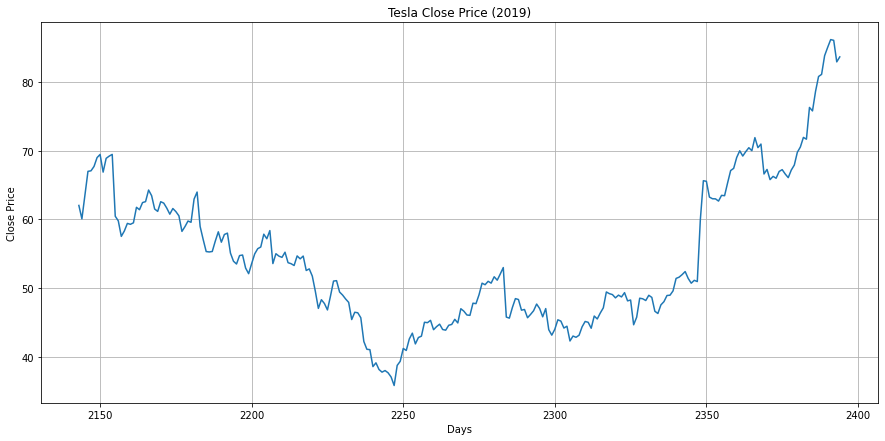

In [5]:
# Plot Validation Data
plt.figure(figsize=(15,7))
plt.title('Tesla Close Price (2019)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(X2[:, 0], y2)
plt.grid()
plt.show()

In [6]:
# Split training set data. 75/25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)

(1606, 5)
(1606,)


In [7]:
# Train Linear Model
linear_model = LinearRegression().fit(x_train, y_train)

In [8]:
# Function that plots closed vs predicted close
def plot_cvp(days, y_actual, yhat, title='Actual vs Model'):
    plt.figure(figsize=(15,7))
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Close Price')
    plt.scatter(days, y_actual)
    plt.scatter(days, yhat)
    plt.legend(['Actual', 'Predicted'])
    plt.show()

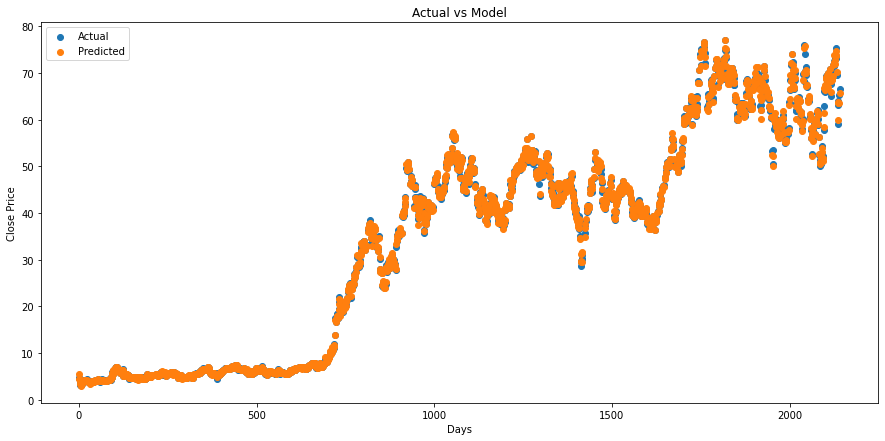

In [9]:
# Plot y_train and yhat_train
yhat_train = linear_model.predict(x_train)
plot_cvp(x_train[:, 0], y_train, yhat_train)

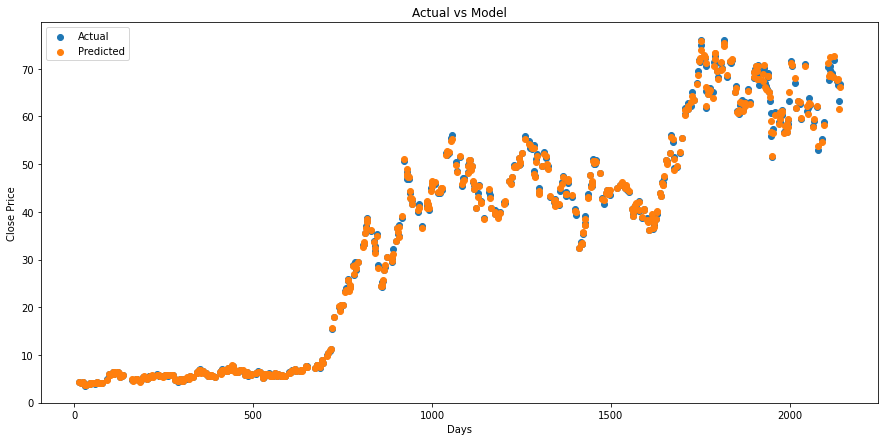

In [10]:
# Plot y_test and yhat_test
yhat_test = linear_model.predict(x_test)
plot_cvp(x_test[:, 0], y_test, yhat_test)

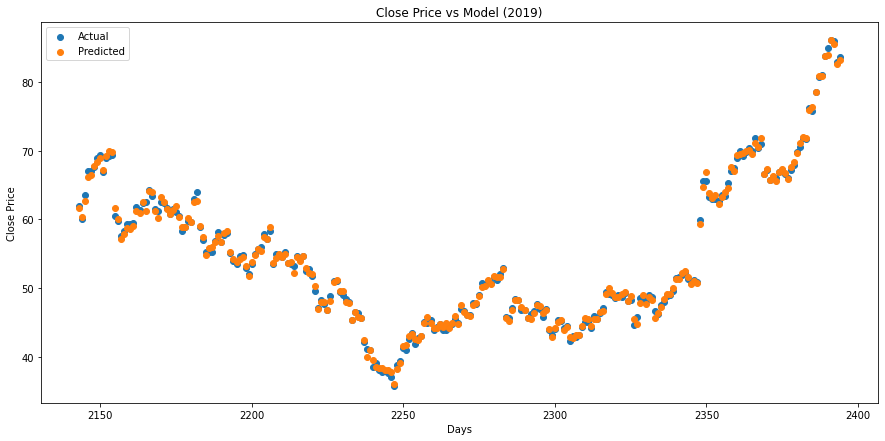

In [11]:
# Plot actual vs pred of 2019 data
yhat = linear_model.predict(X2)
title = 'Close Price vs Model (2019)'
plot_cvp(X2[:, 0], y2, yhat, title)

In [12]:
# Function to print the coeff of determination of the models
def print_R2(model, x_train, y_train, x_test, y_test, X2, y2):
    R2_train = model.score(x_train, y_train)
    print('Train R2: ', R2_train)
    R2_test = model.score(x_test, y_test)
    print('Test R2: ', R2_test)
    R2 = model.score(X2, y2)
    print('2019 R2: ', R2)

In [13]:
# Multiple Linear Regression R2 for model
print_R2(linear_model, x_train, y_train, x_test, y_test, X2, y2)

Train R2:  0.9997183302498194
Test R2:  0.9996974986722604
2019 R2:  0.9981396292896066


# Feature Transformation

# Square Features

In [14]:
# Square the features (Open, High, Low, Volume)
new_x = X[:,1:] ** 2
days = np.arange(X.shape[0]).reshape(X.shape[0], 1)
new_x = np.hstack((days, new_x))

# Split data 75/25
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=42)

# Train linear model
linear_model = LinearRegression().fit(x_train, y_train)

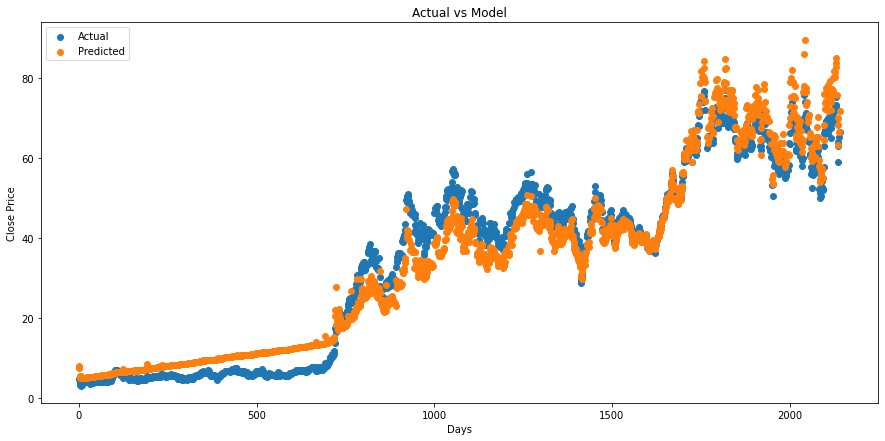

In [15]:
# Plot y_train and yhat_train
yhat_train = linear_model.predict(x_train)
plot_cvp(x_train[:, 0], y_train, yhat_train)

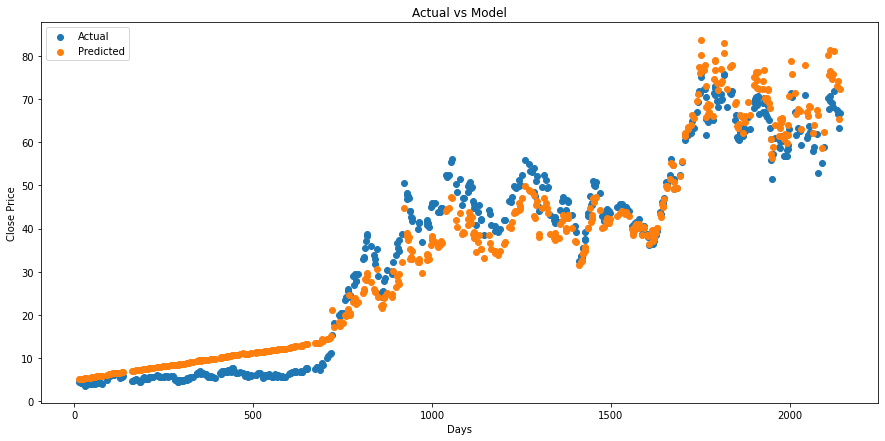

In [16]:
# Plot y_test and yhat_test
yhat_test = linear_model.predict(x_test)
plot_cvp(x_test[:, 0], y_test, yhat_test)

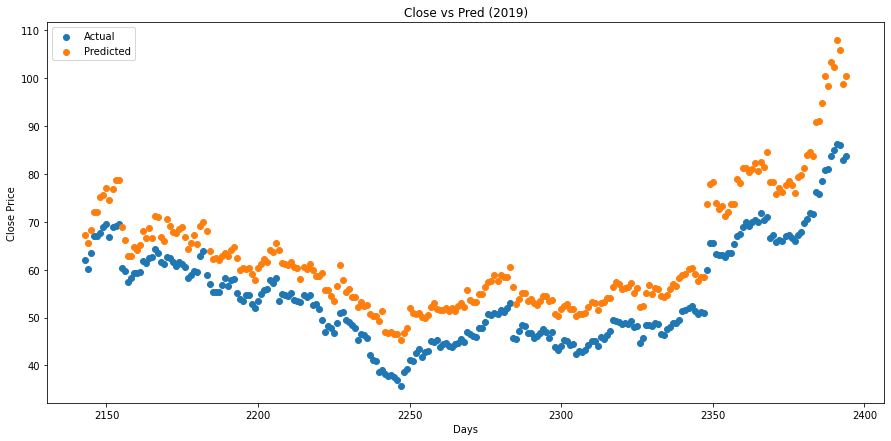

In [17]:
# Predict with 2019 data
new_x = X2[:,1:] ** 2
days = np.arange(X.shape[0] + 1, X.shape[0] + X2.shape[0] + 1).reshape(X2.shape[0], 1)
new_x = np.hstack((days, new_x))

# Plot 2019 data
yhat = linear_model.predict(new_x)
title = 'Close vs Pred (2019)'
plot_cvp(X2[:, 0], y2, yhat, title)

In [18]:
# Print R2 values
print_R2(linear_model, x_train, y_train, x_test, y_test, new_x, y2)

Train R2:  0.9546725756627319
Test R2:  0.9575787629269158
2019 R2:  0.3280198758900278


# Log Features

In [19]:
# Log the features (Open, High, Low, Volume)
new_x = np.log(X[:,1:]) 
days = np.arange(X.shape[0]).reshape(X.shape[0], 1)
new_x = np.hstack((days, new_x))

# Split data 75/25
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=42)

# Train linear model
linear_model = LinearRegression().fit(x_train, y_train)

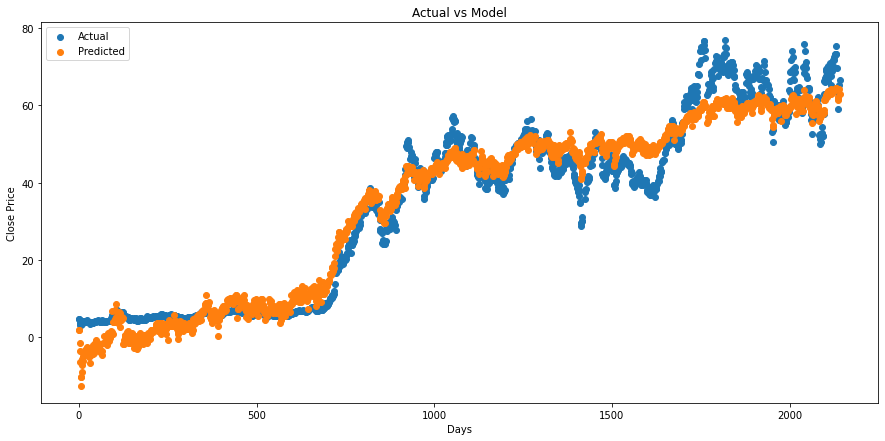

In [20]:
# Plot y_train and yhat_train
yhat_train = linear_model.predict(x_train)
plot_cvp(x_train[:, 0], y_train, yhat_train)

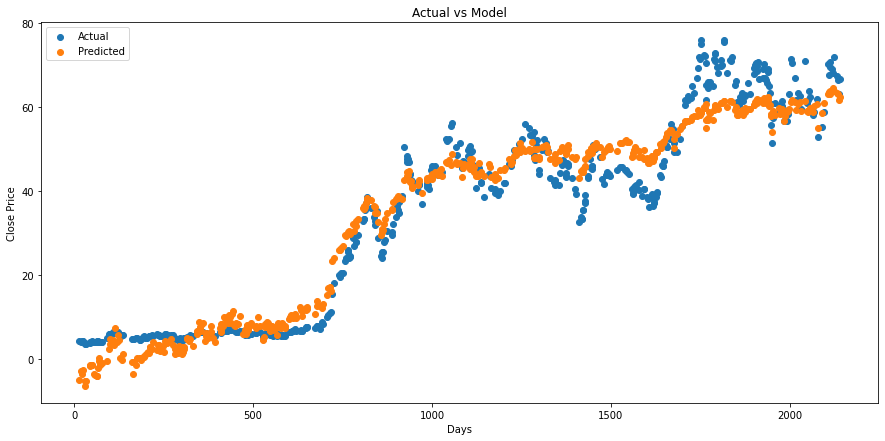

In [21]:
# Plot y_test and yhat_test
yhat_test = linear_model.predict(x_test)
plot_cvp(x_test[:, 0], y_test, yhat_test)

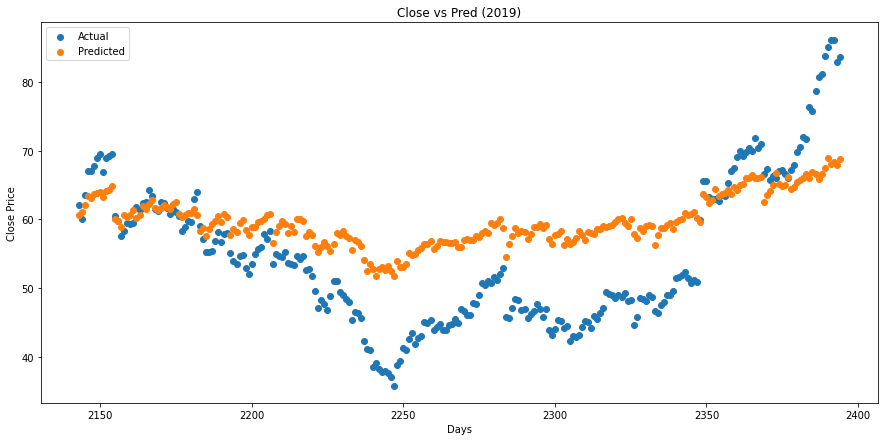

In [22]:
# Predict with 2019 data
new_x = np.log(X2[:,1:])
days = np.arange(X.shape[0] + 1, X.shape[0] + X2.shape[0] + 1).reshape(X2.shape[0], 1)
new_x = np.hstack((days, new_x))

# Plot 2019 data
yhat = linear_model.predict(new_x)
title = 'Close vs Pred (2019)'
plot_cvp(X2[:, 0], y2, yhat, title)

In [23]:
# Print R2 values
print_R2(linear_model, x_train, y_train, x_test, y_test, new_x, y2)

Train R2:  0.9498660617210813
Test R2:  0.9503360221799648
2019 R2:  0.30056302050384176


# Regularization

In [24]:
# Import Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso

def regularization(regtype, x_train, y_train, x_test, y_test, X2, y2):
    lambdas = np.geomspace(0.001, 10, 5)
    R2_tr = []
    R2_ts = []
    R2_v = []
    # loop through possibilities of lambda
    for val in lambdas:
        # Get model type
        if regtype == 'r':
            model = Ridge(alpha=val)
        else:
            model = Lasso(alpha=val)
        # Train model
        model.fit(x_train, y_train)

        # Graph Close vs Prediction with 2019 data
        yhat = model.predict(X2)
        title = 'Close vs Pred (2019)'
        plot_cvp(X2[:, 0], y2, yhat, title)
       
        # Print lambda and R2
        print('lambda = {}'.format(val))
#         print_R2(model, x_train, y_train, x_test, y_test, X2, y2)


        R2_train = model.score(x_train, y_train)
        R2_tr.append(R2_train)
        print('Train R2: ', R2_train)
        
        R2_test = model.score(x_test, y_test)
        R2_ts.append(R2_test)
        print('Test R2: ', R2_test)
        
        R2 = model.score(X2, y2)
        R2_v.append(R2)
        print('2019 R2: ', R2)
    
    return lambdas, R2_tr, R2_ts, R2_v


In [25]:
# Back to using original data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ridge Regression

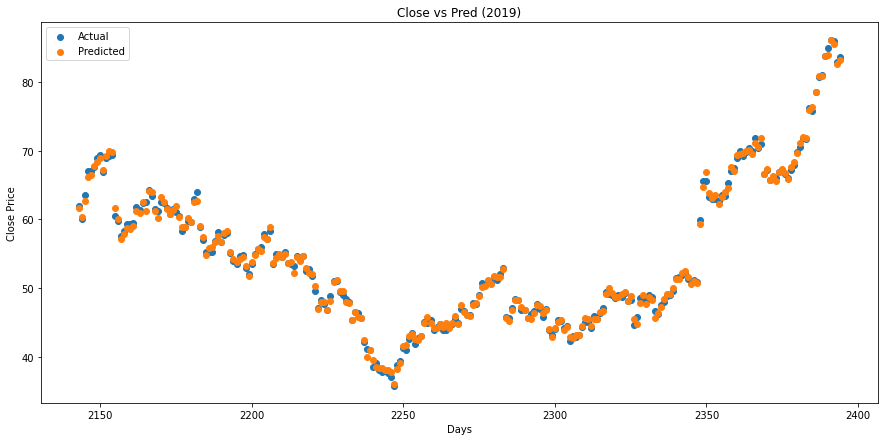

lambda = 0.001
Train R2:  0.9997183302498143
Test R2:  0.9996974985304032
2019 R2:  0.9981396283691


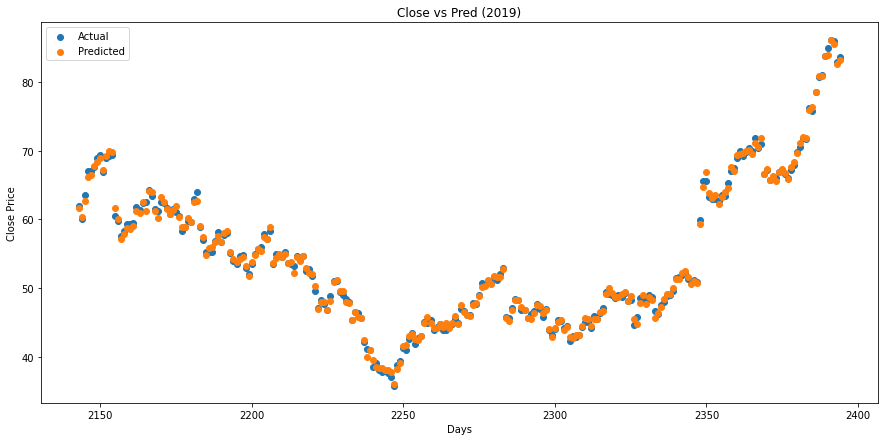

lambda = 0.01
Train R2:  0.9997183302493108
Test R2:  0.9996974972533909
2019 R2:  0.9981396200772353


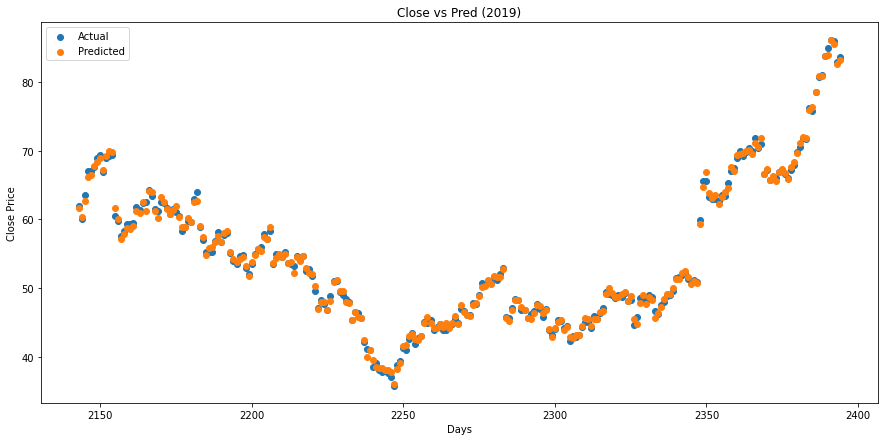

lambda = 0.1
Train R2:  0.9997183301989914
Test R2:  0.9996974844351897
2019 R2:  0.9981395368608135


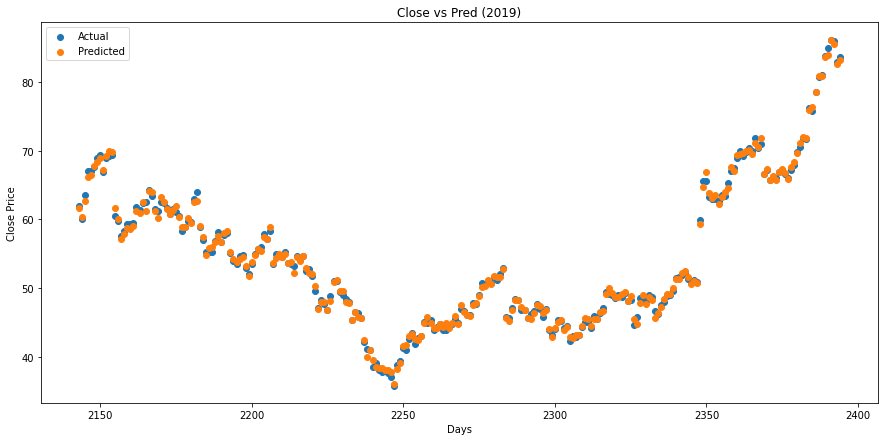

lambda = 1.0
Train R2:  0.9997183251955448
Test R2:  0.9996973514767521
2019 R2:  0.9981386751127295


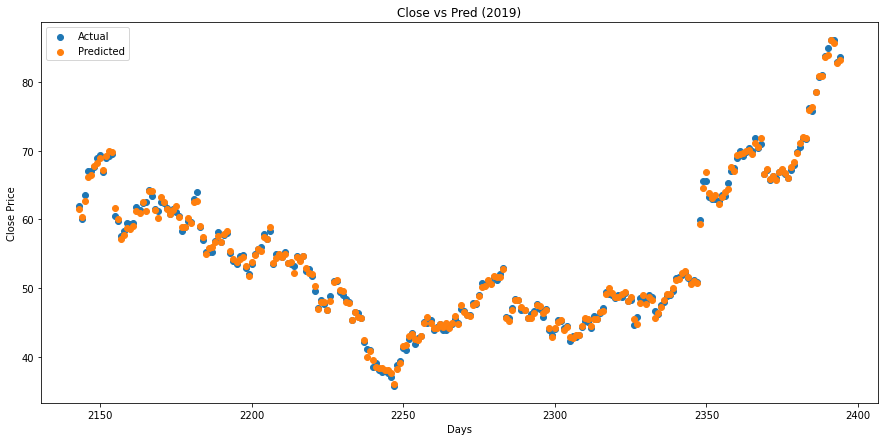

lambda = 10.0
Train R2:  0.9997178520735001
Test R2:  0.9996955741041179
2019 R2:  0.9981272839092118


In [26]:
lambdas, R2_tr, R2_ts, R2_v = regularization('r',x_train, y_train, x_test, y_test, X2, y2)

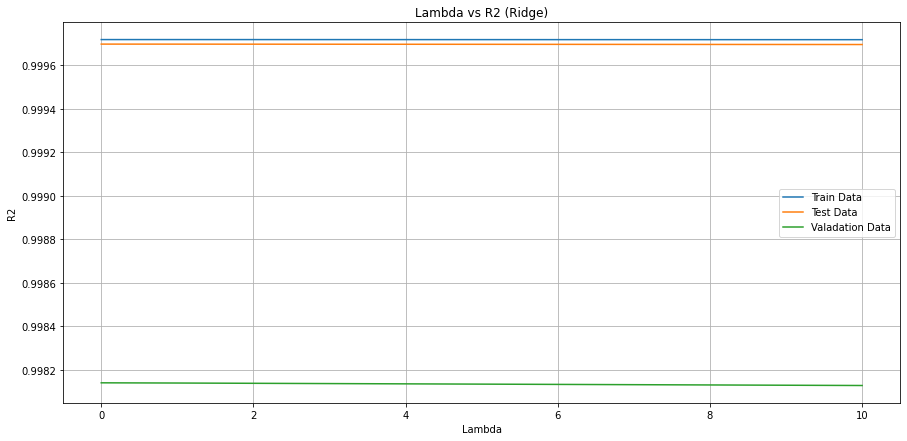

In [27]:
# Plot R2 value graph based on lambda
plt.figure(figsize=(15,7))
plt.title('Lambda vs R2 (Ridge)')
plt.xlabel('Lambda')
plt.ylabel('R2')
plt.plot(lambdas, R2_tr)
plt.plot(lambdas, R2_ts)
plt.plot(lambdas, R2_v)
plt.legend(['Train Data', 'Test Data', 'Valadation Data'])
plt.grid()
plt.show()

# Lasso Regression

c:\users\david\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.1680391023364, tolerance: 83.94782037046586
  model = cd_fast.enet_coordinate_descent(


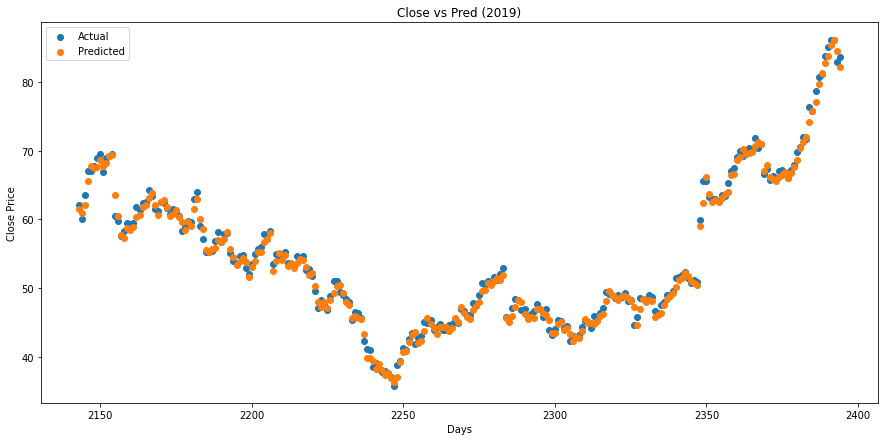

lambda = 0.001
Train R2:  0.9992375843927265
Test R2:  0.9991265111453718
2019 R2:  0.994191108706899


c:\users\david\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.92511883609484, tolerance: 83.94782037046586
  model = cd_fast.enet_coordinate_descent(


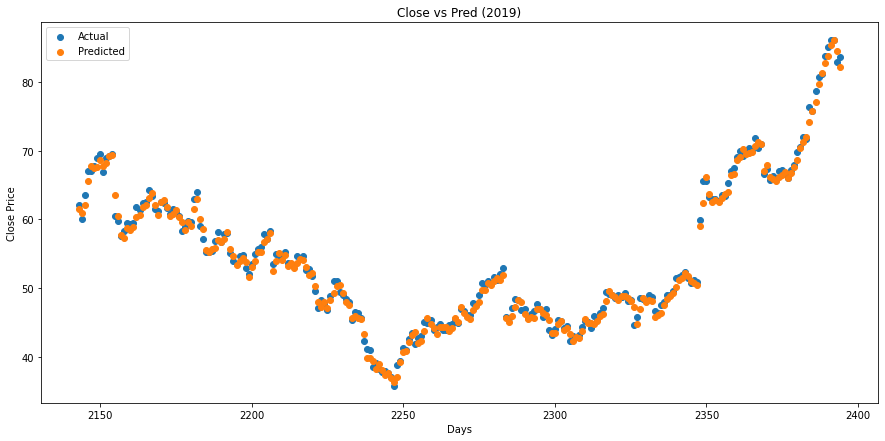

lambda = 0.01
Train R2:  0.9992375977540062
Test R2:  0.9991268655338597
2019 R2:  0.9942050258814286


c:\users\david\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.6851443240812, tolerance: 83.94782037046586
  model = cd_fast.enet_coordinate_descent(


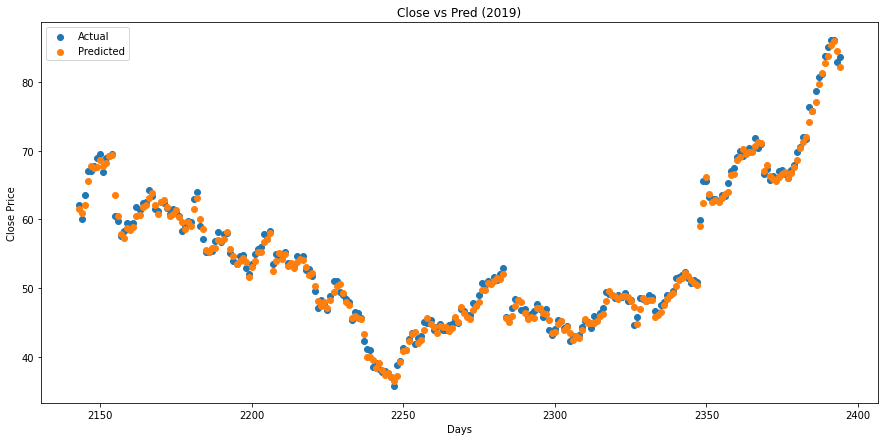

lambda = 0.1
Train R2:  0.9992374602925703
Test R2:  0.9991301512944848
2019 R2:  0.9943339545741767


c:\users\david\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.201462989603, tolerance: 83.94782037046586
  model = cd_fast.enet_coordinate_descent(


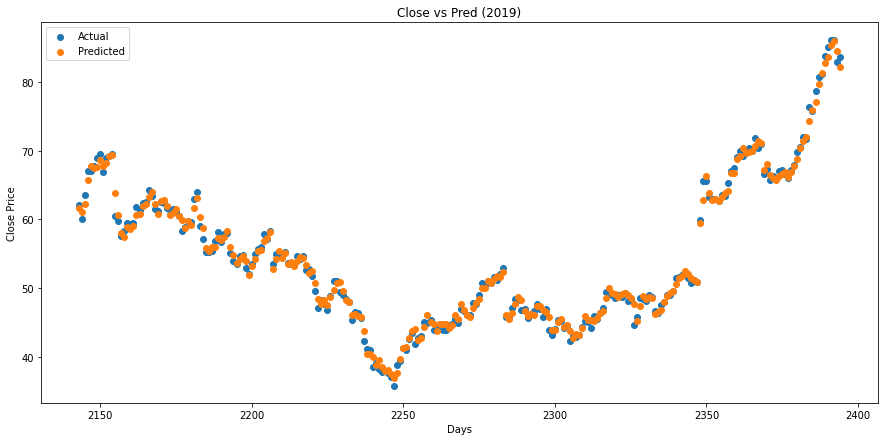

lambda = 1.0
Train R2:  0.9992110621657958
Test R2:  0.9991357957659829
2019 R2:  0.9946339015591725


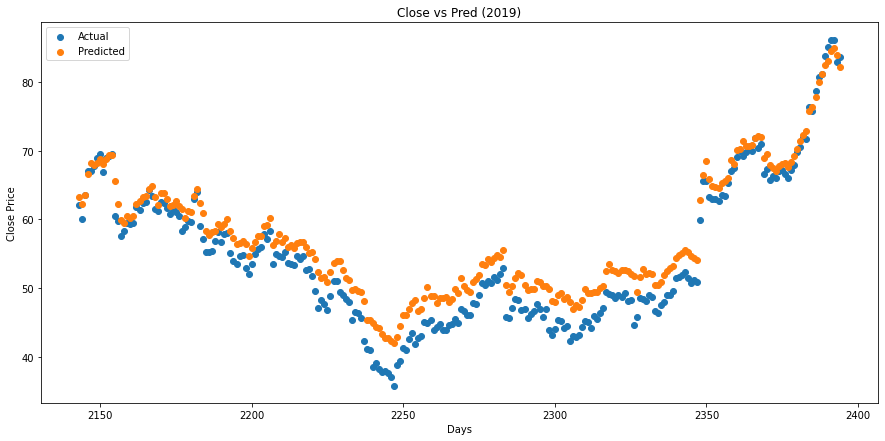

lambda = 10.0
Train R2:  0.9967214724569369
Test R2:  0.9970570000108532
2019 R2:  0.9095829523655257


In [28]:
lambdas, R2_tr, R2_ts, R2_v = regularization('l',x_train, y_train, x_test, y_test, X2, y2)

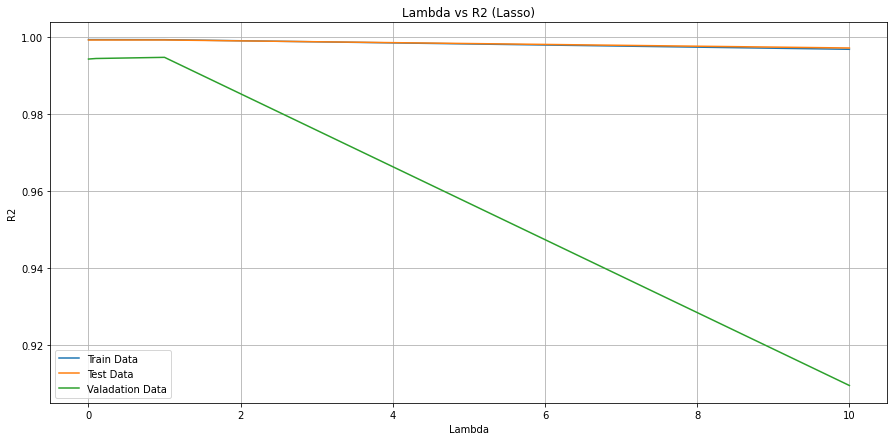

In [29]:
# Plot R2 value graph based on lambda
plt.figure(figsize=(15,7))
plt.title('Lambda vs R2 (Lasso)')
plt.xlabel('Lambda')
plt.ylabel('R2')
plt.plot(lambdas, R2_tr)
plt.plot(lambdas, R2_ts)
plt.plot(lambdas, R2_v)
plt.legend(['Train Data', 'Test Data', 'Valadation Data'])
plt.grid()
plt.show()